# SetUp

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import re
from PIL import ImageFont, ImageDraw, Image, ImageOps
from collections import Counter
import copy

# Analysis_Result_Json
 - read
 - write

In [2]:
# save result_30fps.json
import json

# write json
file_path = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/engine_result/result_30fps.json'
json_data = result_30

with open(file_path, 'w') as outfile:
    json.dump(json_data, outfile, indent=4) #indent를 넣으면 보기좋게 들여쓰기 줄간격 정도 4

NameError: name 'result_1' is not defined

In [2]:
# read result_30fps.json

file_path = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/engine_result/result_30fps.json'

with open(file_path, "r") as json_file:
    json_data = json.load(json_file)

result_30 = json_data

# Labeling
 - Bounding Box
 - Class Label

In [313]:
len(result_1['nuddle']['food']['frame_results']) * 30

14790

In [324]:
len(result_30['egg']['food']['frame_results'])

11107

In [567]:
result_30['egg']['places']['frame_results']

[{'frame_number': 30,
  'timestamp': '0:00:01',
  'frame_url': '/media/20220707/egg/frames/00001.jpg',
  'frame_result': [{'label': {'description': 'exhibition',
     'score': 85.37590503692627}},
   {'label': {'description': 'koreanhouse', 'score': 11.991677433252335}},
   {'label': {'description': 'hotel', 'score': 2.137334644794464}},
   {'label': {'description': 'shoppingmall', 'score': 0.3253374481573701}},
   {'label': {'description': 'store', 'score': 0.05302201607264578}}]},
 {'frame_number': 60,
  'timestamp': '0:00:02',
  'frame_url': '/media/20220707/egg/frames/00002.jpg',
  'frame_result': [{'label': {'description': 'exhibition',
     'score': 52.321016788482666}},
   {'label': {'description': 'hotel', 'score': 40.19572138786316}},
   {'label': {'description': 'cafe', 'score': 2.042072080075741}},
   {'label': {'description': 'amusementpark', 'score': 1.591675728559494}},
   {'label': {'description': 'koreanhouse', 'score': 1.1289909482002258}}]},
 {'frame_number': 90,
  't

In [ ]:
for  i in result_30['bundaegi']['food']['frame_results']:
    print(i['frame_number'], i['frame_result'] != None)

In [332]:
frame_dir = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/frame/'
# len(os.listdir(f"{frame_dir}egg.mp4/"))
fr_l = [int(file_name[:-4]) for file_name in os.listdir(f"{frame_dir}egg.mp4/")]
fr_l.sort()
fr_l[-5:] #아하! 맨 마지막 frame의 분석 result값이 없네!? 그럼 뭐, 빼지.

[11104, 11105, 11106, 11107, 11108]

# 2. Draw Bbox + Label
### - 분할(30) fps == 분석(1) fps 경우
   -  Engine_Result: result_30 : 30fps로 아래 4가지 모듈로 추출한 json 형식 결과 dictionary

In [ ]:
# Engine_Result
#result_30 : 30fps로 아래 4가지 모듈로 추출한 json 형식 결과 dictionary

# Score 기준 - 아래 score 기준치 바꿔주면 된다.
#places 최댓값
#food는 70기준
#scentxt, obj 0.7기준


#legend, size
legend = Image.open('C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/legend.jpg')
l_w, l_h = legend.size
ratio_size = 0.42
legend = legend.resize((int(l_w*ratio_size), int(l_h*ratio_size)))

#Engine_Result(json)
result = result_30
fps = 30

module_list = ['places', 'food', 'obj', 'scenetxt'] #places를 제일 먼저 돌려, 덮은 이미지에 가리지 않게 해주자.

frame_dir = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/frame/' 
sav_dir = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/'
frame_list = os.listdir(frame_dir)

for video in ['egg.mp4']: #frame_list #Dataset_structure: frame > video(e.g. egg.mp4) folders > img
    img_dir = f"{frame_dir}{video}/"
    img_list = os.listdir(img_dir)
    
    #sort by ascending order
    img_list = [int(img_name[:-4]) for img_name in img_list] 
    img_list.sort()
    img_list = [str(img_int) + '.jpg' for img_int in img_list]
    
    for img in img_list:
        img_path = img_dir + img
        img_name, _ = img.split('.')
        
        # (중첨) 이미지 불러오기 및 복사 -> 한 이미지에 4 모듈의 결과를 나타내려면            
        image = Image.open(img_path)
        copy_image = image.copy()
        
        for module in module_list:
            
            print(f"____영상: {video}의 {img_name}/{len(img_list)}번째 프레임의 {module} 돌아가는 중____")
            
            #영상과 모듈 이름에 따라 dir 생성(여러 개 생성 및 이미 존재 에러 예외 처리)
            os.makedirs(f"{sav_dir}fps_30/{video}/mix", exist_ok=True) #(중첨) 
            
#             # 이미지 불러오기 및 복사 -> 모듈마다 따로 결과를 나타내려면           
#             image = Image.open(img_path)
#             copy_image = image.copy()
            
#             #일단 이미지 저장하기
#             copy_image.save(f"{sav_dir}fps_30/{video}/mix/{img}", "JPEG")
            
            for fr_results in result[video[:-4]][module]['frame_results']:     
                #(result가 None 이면 pass!) & (result가 있는 img만!)
                if (fr_results['frame_result'] != None) and (str(int(fr_results['frame_number']/fps)) == img_name): 
                    
                    print(f"__{img_name}번째 프레임은 그리는 중__") 
                    
                    max_score = -1 #임시 최댓값(최대 레이블 추출)
                    
                    for i in range(0, len(fr_results['frame_result'])): #객체 수만큼 draw
                        
                        
                        if module == 'food':
                            

                            if fr_results['frame_result'][i]['label'][0]['score'] > 70: #음식은 70 이상

                                x1 = fr_results['frame_result'][i]['position']['x']
                                y1 = fr_results['frame_result'][i]['position']['y']
                                x2 = fr_results['frame_result'][i]['position']['w'] #값을 보면 w가 x2
                                y2 = fr_results['frame_result'][i]['position']['h'] #값을 보면 h가 y2

                                #한글 레이블링(PIL)
                                fontpath = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
                                font = ImageFont.truetype(fontpath, 33)
                                text = fr_results['frame_result'][i]['label'][0]['description']
                                w, h = font.getsize(text)
                                
                                draw = ImageDraw.Draw(copy_image, "RGBA") #Alpha 투명도
                                draw.rectangle((x1, y1, x1+ w, y1+ h), fill=(50,0,0,100)) #food: red (text-background)
                                draw.text((x1, y1), text, font=font, fill='white')
                                
                                #Bounding Box
                                draw.rectangle((x1,y1,x2,y2), outline=(255,0,0,255), width=2) #food: red


                        elif module == 'places':

                             
                            if fr_results['frame_result'][i]['label']['score'] > max_score: #places는 (최대 레이블 추출)
                                # 최대 점수 갱신 (최대 레이블 추출)
                                max_score = fr_results['frame_result'][i]['label']['score'] 

#                                 #(이미지 초기화) Cover text region for claaring it
#                                 img_cover = Image.open(img_path)
#                                 img_cover_np = np.array(img_cover)
                                
#                                 copy_image_np = np.array(copy_image)
#                                 copy_image_np[0:38, 0:215] = img_cover_np[0:38, 0:215] #font_size: 33 -> [gap_38, max(shoppingmall)_215]
#                                 copy_image = Image.fromarray(copy_image_np)
                                
                                #최대 점수면 이미지 초기화 (최대 레이블 추출)
                                image = Image.open(img_path)
                                copy_image = image.copy()
                                img_w, img_h = copy_image.size
                                
                                #좌측 상단에 장소 레이블 표시
                                fontpath = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
                                font = ImageFont.truetype(fontpath, 33)
                                text = fr_results['frame_result'][i]['label']['description']
                                w, h = font.getsize(text)
                                
                                draw = ImageDraw.Draw(copy_image, "RGBA")
                                draw.rectangle((img_w-w, img_h-h, img_w, img_h), fill=(50,50,50,100)) #right bottom #places: gray
                                draw.text((img_w-w, img_h-h), text, font=font, fill='white')


                        else: #module == obj & scenetxt
                            
                            if fr_results['frame_result'][i]['label'][0]['score'] > 0.7: #obj와 scenetxt 0.7이상

                                x1 = fr_results['frame_result'][i]['position']['x']
                                y1 = fr_results['frame_result'][i]['position']['y']
                                x2 = x1+ fr_results['frame_result'][i]['position']['w'] 
                                y2 = y1+ fr_results['frame_result'][i]['position']['h']

                                #한글 레이블링(PIL)
                                fontpath = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
                                font = ImageFont.truetype(fontpath, 33)
                                text = fr_results['frame_result'][i]['label'][0]['description']
                                w, h = font.getsize(text)
                                
                                draw = ImageDraw.Draw(copy_image, "RGBA")
                                if module == 'obj':
                                    draw.rectangle((x1, y1, x1+ w, y1+ h), fill=(0,0,50,100)) #obj: blue
                                    draw.text((x1, y1), text, font=font, fill='white')
                                
                                    #Bounding Box
                                    draw.rectangle((x1,y1,x2,y2), outline=(0,0,255,255), width=2) #obj: blue
                                
                                else:#module == 'scenetxt'
                                    
                                    draw.rectangle((x1, y1, x1+ w, y1+ h), fill=(0,50,0,100)) #scenetxt: green
                                    draw.text((x1, y1), text, font=font, fill='white')
                                
                                    #Bounding Box
                                    draw.rectangle((x1,y1,x2,y2), outline=(0,255,0,255), width=2) #scenetxt: green
                            
                    
#                     # draw 갱신해서 덮어쓰기 (생성한 directory에 result 반영된 이미지)
#                     copy_image.save(f"{sav_dir}{video}/mix/{img}", "JPEG")
            
    
        #legend 위치 - Top right
        w, h = copy_image.size
        copy_image.paste(legend, (int(w*0.86), int(h*0.05)))

        # (중첩) 모든 Module result가 그려진 이미지 저장하기
        copy_image.save(f"{sav_dir}fps_30/{video}/mix/{img}", "JPEG")
                    
                            #Appendix
#                                 #숫자나 영문 레이블링(open-cv)
#                                 cv2.putText(copy_image, fr_results['frame_result'][i]['label'][0]['description'], (x1 + 20, y1 + 20)
#                                            ,cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),1)
#                                 putText(img_resize, to_string(j), Point(left + 20, top + 20),FONT_HERSHEY_SIMPLEX, 1, Scalar(255, 0, 0),1);
                                

#                                 plt.imshow(img)
#                                 plt.axis('off')
#                                 plt.show()

                            #Appendix(2)
                                #food 최대 레이블 추출시
#                                 max_score = -1
#                                 if fr_results['frame_result'][i]['label']['score'] > max_score: #(최대 레이블 추출)
                                    
#                                     #최대 점수 갱신 (최대 레이블 추출)
#                                     max_score = fr_results['frame_result'][i]['label'][0]['score']

#                                     #최대 점수면 이미지 초기화 (최대 레이블 추출)
#                                     image = cv2.imread(img_path)
#                                     copy_image = image.copy()

                            #Appendix(3)
#                                 #단일 dir 생성시 예외 처리
#                             try:
#                                 os.mkdir('./a/')
#                             except FileExistsError:
#                                 pass

In [ ]:
# Example of output

# ____영상: egg.mp4의 1/11108번째 프레임의 places 돌아가는 중____
# __1번째 프레임은 그리는 중__
# ____영상: egg.mp4의 1/11108번째 프레임의 food 돌아가는 중____
# __1번째 프레임은 그리는 중__
# ____영상: egg.mp4의 1/11108번째 프레임의 obj 돌아가는 중____
# __1번째 프레임은 그리는 중__
# ____영상: egg.mp4의 1/11108번째 프레임의 scenetxt 돌아가는 중____
# __1번째 프레임은 그리는 중__
# ____영상: egg.mp4의 2/11108번째 프레임의 places 돌아가는 중____
# __2번째 프레임은 그리는 중__
# ____영상: egg.mp4의 2/11108번째 프레임의 food 돌아가는 중____
# __2번째 프레임은 그리는 중__
# ____영상: egg.mp4의 2/11108번째 프레임의 obj 돌아가는 중____
# __2번째 프레임은 그리는 중__
# ____영상: egg.mp4의 2/11108번째 프레임의 scenetxt 돌아가는 중____
# __2번째 프레임은 그리는 중__

# 2. Draw Bbox + Label
### - 분할(30) fps != 분석(1) fps 경우
   - Engine_Result: result_1 : 1fps로 아래 4가지 모듈로 추출한 json 형식 결과 dictionary


In [ ]:
# Engine_Result
#result_1 : 1fps로 아래 4가지 모듈로 추출한 json 형식 결과 dictionary

# Score 기준 - 아래 score 기준치 바꿔주면 된다.
#places 최댓값
#food는 70기준
#scentxt, obj 0.7기준

#Engine_Result(json)
result = result_1
fps = 1

module_list = ['places', 'food', 'obj', 'scenetxt'] #places를 제일 먼저 돌려, 덮은 이미지에 가리지 않게 해주자.

frame_dir = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/frame/'
sav_dir = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/'
frame_list = os.listdir(frame_dir)

for video in frame_list:
    img_dir = f"{frame_dir}{video}/"
    img_list = os.listdir(img_dir)
    
    for img in img_list:
        img_path = img_dir + img
        img_name, _ = img.split('.')
        
#         # 이미지 불러오기 및 복사 -> 한 이미지에 4 모듈의 결과를 중첩시키려고 한다면            
#         image = Image.open(img_path)
#         copy_image = image.copy()
        
        for module in module_list:
            
            print(f"____영상: {video}의 {img_name}/{len(img_list)}번째 프레임의 {module} 돌아가는 중____")
            
            #영상과 모듈 이름에 따라 dir 생성(여러 개 생성 및 이미 존재 에러 예외 처리)
            os.makedirs(f"{sav_dir}{video}/{module}", exist_ok=True)
            
            # 이미지 불러오기 및 복사 -> 모듈마다 새로운 이미지에 따로 결과를 나타내려면           
            image = Image.open(img_path)
            copy_image = image.copy()
            
#             #result가 없는 이미지도 그냥 저장하기
#             copy_image.save(f"{sav_dir}{video}/{module}/{img}", "JPEG")
            
            for fr_results in result[video[:-4]][module]['frame_results']: #1 video의 총 frame의 개수
                
                #(result가 None 이면 pass!) & (result가 있는 img만!)
                if (fr_results['frame_result'] != None) and (str(int(fr_results['frame_number']/fps)) == img_name): 
                    
                    print(f"__{img_name}번째 프레임은 그리는 중__") 
                    
                    max_score = -1 #임시 최댓값(최대 레이블 추출)
                    
                    for i in range(0, len(fr_results['frame_result'])): #1frame의 탐지 대상의 수만큼 draw
                        
                        
                        if module == 'food':

                            if fr_results['frame_result'][i]['label'][0]['score'] > 70: #음식은 70 이상

                                x1 = fr_results['frame_result'][i]['position']['x']
                                y1 = fr_results['frame_result'][i]['position']['y']
                                x2 = fr_results['frame_result'][i]['position']['w'] #값을 보면 w가 x2
                                y2 = fr_results['frame_result'][i]['position']['h'] #값을 보면 h가 y2

                                #한글 레이블링(PIL)
                                fontpath = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
                                font = ImageFont.truetype(fontpath, 33)
                                text = fr_results['frame_result'][i]['label'][0]['description']
                                w, h = font.getsize(text)
                                
                                draw = ImageDraw.Draw(copy_image, "RGBA") #Alpha 투명도
                                draw.rectangle((x1, y1, x1+ w, y1+ h), fill=(0,50,0,100)) #text-background
                                draw.text((x1, y1), text, font=font, fill='white')
                                
                                #Bounding Box
                                draw.rectangle((x1,y1,x2,y2), outline=(0,255,0,255), width=2)


                        elif module == 'places':

                             
                            if fr_results['frame_result'][i]['label']['score'] > max_score: #places는 (최대 레이블 추출)
                                # 최대 점수 갱신 (최대 레이블 추출)
                                max_score = fr_results['frame_result'][i]['label']['score'] 

                                #최대 점수면 이미지 초기화 (최대 레이블 추출)
                                image = Image.open(img_path)
                                copy_image = image.copy()

                                #좌측 상단에 장소 레이블 표시
                                fontpath = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
                                font = ImageFont.truetype(fontpath, 33)
                                text = fr_results['frame_result'][i]['label']['description']
                                w, h = font.getsize(text)
                                
                                draw = ImageDraw.Draw(copy_image, "RGBA")
                                draw.rectangle((20, 20, 20+ w, 20+ h), fill=(0,50,0,100))
                                draw.text((20, 20), text, font=font, fill='white')


                        else: #module == obj & scenetxt
                            
                            if fr_results['frame_result'][i]['label'][0]['score'] > 0.7: #obj와 scenetxt 0.7이상

                                x1 = fr_results['frame_result'][i]['position']['x']
                                y1 = fr_results['frame_result'][i]['position']['y']
                                x2 = x1+ fr_results['frame_result'][i]['position']['w'] 
                                y2 = y1+ fr_results['frame_result'][i]['position']['h']

                                #한글 레이블링(PIL)
                                fontpath = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
                                font = ImageFont.truetype(fontpath, 33)
                                text = fr_results['frame_result'][i]['label'][0]['description']
                                w, h = font.getsize(text)
                                
                                draw = ImageDraw.Draw(copy_image, "RGBA")
                                draw.rectangle((x1, y1, x1+ w, y1+ h), fill=(0,50,0,100))
                                draw.text((x1, y1), text, font=font, fill='white')
                                
                                #Bounding Box
                                draw.rectangle((x1,y1,x2,y2), outline=(0,255,0,255), width=2)
                    
                    
                    #result가 그려진 이미지를 생성한 directory에 저장
                    copy_image.save(f"{sav_dir}{video}/{module}/{img}", "JPEG") 
            
                            #Appendix
#                                 #1. 숫자나 영문 레이블링(open-cv)
#                                 cv2.putText(copy_image, fr_results['frame_result'][i]['label'][0]['description'], (x1 + 20, y1 + 20)
#                                            ,cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),1)
#                                 putText(img_resize, to_string(j), Point(left + 20, top + 20),FONT_HERSHEY_SIMPLEX, 1, Scalar(255, 0, 0),1);
                                

#                                 plt.imshow(img)
#                                 plt.axis('off')
#                                 plt.show()

                            
                                #2. food 최대 레이블 추출시
#                                 max_score = -1
#                                 if fr_results['frame_result'][i]['label']['score'] > max_score: #(최대 레이블 추출)
                                    
#                                     #최대 점수 갱신 (최대 레이블 추출)
#                                     max_score = fr_results['frame_result'][i]['label'][0]['score']

#                                     #최대 점수면 이미지 초기화 (최대 레이블 추출)
#                                     image = cv2.imread(img_path)
#                                     copy_image = image.copy()

#                                 #3. 단일 dir 생성시 예외 처리
#                             try:
#                                 os.mkdir('./a/')
#                             except FileExistsError:
#                                 pass

In [ ]:
# Example of Output

# ____영상: bundaegi.mp4의 1번째 프레임의 food 돌아가는 중____
# ____영상: bundaegi.mp4의 1번째 프레임의 places 돌아가는 중____
# ____영상: bundaegi.mp4의 1번째 프레임의 obj 돌아가는 중____
# ____영상: bundaegi.mp4의 1번째 프레임의 scenetxt 돌아가는 중____
# ____영상: bundaegi.mp4의 10번째 프레임의 food 돌아가는 중____
# ____영상: bundaegi.mp4의 10번째 프레임의 places 돌아가는 중____
# ____영상: bundaegi.mp4의 10번째 프레임의 obj 돌아가는 중____
# ____영상: bundaegi.mp4의 10번째 프레임의 scenetxt 돌아가는 중____
# ____영상: bundaegi.mp4의 100번째 프레임의 food 돌아가는 중____
# ____영상: bundaegi.mp4의 100번째 프레임의 places 돌아가는 중____
# ____영상: bundaegi.mp4의 100번째 프레임의 obj 돌아가는 중____
# ____영상: bundaegi.mp4의 100번째 프레임의 scenetxt 돌아가는 중____


# Image to Video
 - opencv: no_audio
     - fourcc(four character code): 동영상의 코덱, 압축 방식, 색상, 픽셀 포맷 등을 정의하는 정수 값.
         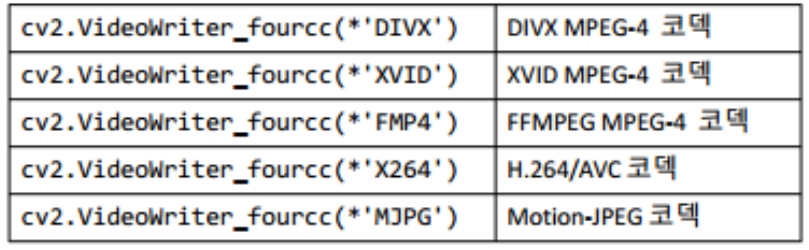

In [355]:
#image to video

#1th step: collect img_dir + sort by ascending order

module_list = ['food', 'places', 'obj', 'scenetxt']

#draw_img_dir
draw_img_dir = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/fps_30/'
video_list = os.listdir(draw_img_dir)

#video_out_dir, fps
fps=30
out_dir = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/merge/no_audio/fps_30/'


for video  in video_list:

    video_dir = f"{draw_img_dir}{video}/"

    for module in module_list:
        
        #initialization
        img_dir = []
        img_frame_list = []
        
        print(f"___{video}의 {module} 분석 이미지를 영상으로 만드는 중___")
        
        #img_dir list
        module_dir = f"{video_dir}{module}/"
        img_dir = [img for img in os.listdir(module_dir) if re.search(".jpg$", img)] #.jpg로 끝나는 파일 리스트
        
        #sort by ascending order
        img_dir = [int(img_name[:-4]) for img_name in img_dir]
        img_dir.sort()
        img_dir = [str(img_int) + '.jpg' for img_int in img_dir]
        
        #read img tensor list
        img_frame_list = [cv2.imread(os.path.join(module_dir, i)) for i in img_dir]
        
        #img size
        h, w, c = img_frame_list[0].shape
        size = (w, h)
        
        #video_out (opencv)
        out = cv2.VideoWriter(f"{out_dir}{video}_{module}.mp4", cv2.VideoWriter_fourcc(*'X264'), fps, size) #H.264 코덱
        
        for i in range(len(img_frame_list)):
            out.write(img_frame_list[i])
        # free resource
        out.release()

___bundaegi.mp4의 food 분석 이미지를 영상으로 만드는 중___


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 6220800 bytes in function 'cv::OutOfMemoryError'


In [ ]:
# img_dir_dic

# {'bundaegi.mp4': [{'food': ['C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1170.jpg',
#     'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1200.jpg',
#     'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1230.jpg',
#     'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1260.jpg',
#     'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1290.jpg',
#     'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1320.jpg',
#     'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1350.jpg',
#     'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1890.jpg',
#      ...

# Appendix
 - Opencv
 - PIL(Python Image Library)
 - text_background
 - Legend
 - Cover for clearing text

True

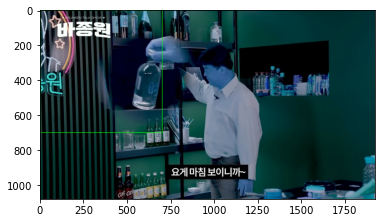

In [305]:
#Appendix - opencv

img_path = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1170.jpg'

image = cv2.imread(img_path)
copy_image = image.copy()

cv2.rectangle(copy_image, (0, 0), (700, 700), (0, 255, 0), 2)

plt.imshow(copy_image)

cv2.imwrite("C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/test_cv.jpg", copy_image) 

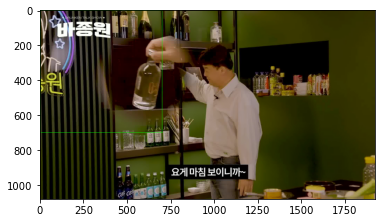

In [304]:
#Appendix- PIL

img_path = 'C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/bundaegi.mp4/food/1170.jpg'

image = Image.open(img_path)
copy_image = image.copy()

draw = ImageDraw.Draw(copy_image, "RGBA")

draw.rectangle((0,0,700,700), outline=(0,255,0,255), width=2)

plt.imshow(copy_image)

copy_image.save("C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/test_pil.jpg", "JPEG")

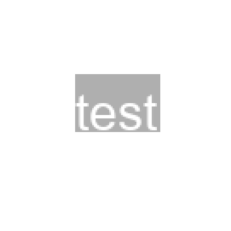

In [415]:
#test: text-background

#canvas
canvas = Image.new('RGB', (128,128), '#fff')

#font, size
fontpath = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
font = ImageFont.truetype(fontpath, 30)
text = 'test'
w, h = font.getsize(text)

#draw
draw = ImageDraw.Draw(canvas, 'RGBA')

draw.rectangle((40,40,40+w, 40+h), fill = (50,50,50,100))
draw.text((40,40), text, font=font, fill='white')

plt.imshow(canvas)
plt.axis('off')
plt.show()

In [367]:
# Resize specific width

import textwrap
lines = textwrap.wrap(text, width=40)
y_text = h

for line in lines:
    width, height = font.getsize(lines)
    draw.text((w - width / 2, y_text), line, font=font, fill='black')
    y_text = += height

In [382]:
# Border

x = Image.open('C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/frame/bundaegi.mp4/1170.jpg')
y = ImageOps.expand(x,border=2,fill='white')
y = ImageOps.expand(y,border=30,fill='black')

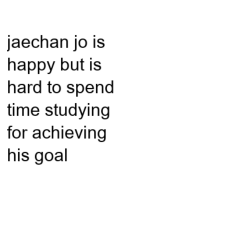

In [409]:
# draw text multilines in bounded width

#canvas
canvas = Image.new('RGB', (375,375), '#fff')

#font, size

text = 'jaechan jo is happy but is hard to spend time studying for achieving his goal'

font_path = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
font = ImageFont.truetype(font_path, 30)
w, h = font.getsize(text)

#draw
draw = ImageDraw.Draw(canvas, 'RGBA')

import textwrap
lines = textwrap.wrap(text, width=15) #bounded width
y_text = h

for line in lines:
    width, height = font.getsize(line)
    draw.text((0, y_text), line, font=font, fill='black')
    y_text += height

# draw.rectangle((40,40,40+w, 40+h), fill = (0,50,0,100))
# draw.multiline_text((40,40), text, font=font, fill='white')

plt.imshow(canvas)
plt.axis('off')
plt.show()

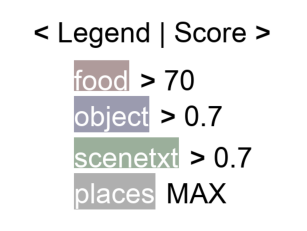

In [502]:
#legend: food: red obj: blue scenetxt: green places: gray

#canvas
canvas = Image.new('RGB', (525,390), '#fff')
canvas_w, canvas_h = canvas.size

#font, size
fontpath = "C:/Program Files/Wondershare/Wondershare DemoCreator (Korean)/Fonts/ARIALUNI.ttf"
font = ImageFont.truetype(fontpath, 50)
text_list = ['food', 'object', 'scenetxt', 'places']
color_list = [(50,0,0,100), (0,0,50,100), (0,50,0,100), (50,50,50,100)] #red, blue, green, gray
score_list = ['> 70', '> 0.7', '> 0.7', 'MAX']

#draw
draw = ImageDraw.Draw(canvas, 'RGBA')

#title
title = '< Legend | Score >'
draw.text((canvas_w*0.09, canvas_h*0.03), title, font=font, fill = 'black')

x0, y0 = (canvas_w*0.23,canvas_h*0.25)
y_text = y0
line_gap = 10
score_gap = 20

for text, color, score in zip(text_list, color_list, score_list):
    
    w, h = font.getsize(text)
    
    draw.rectangle((x0,y_text, x0+w, y_text+h), fill = color)
    draw.text((x0,y_text), text, font=font, fill='white')
    draw.text((x0+w+score_gap, y_text), score, font=font, fill='black')
    y_text += h + line_gap
    
plt.imshow(canvas)
plt.axis('off')
plt.show()

canvas.save('C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/legend.jpg', 'JPEG')

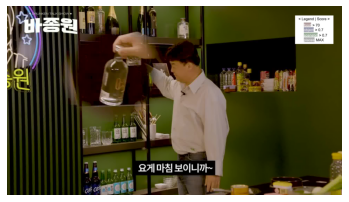

In [506]:
# put legend Top Right

bg = Image.open('C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/frame/bundaegi.mp4/1170.jpg')
w, h = bg.size

legend = Image.open('C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/legend.jpg')
l_w, l_h = legend.size
ratio_size = 0.42
legend = legend.resize((int(l_w*ratio_size), int(l_h*ratio_size)))

bg.paste(legend, (int(w*0.86), int(h*0.05)) ) #0.42, 0.86, 0.05

plt.imshow(bg)
plt.axis('off')
plt.show()

(1920, 1080)


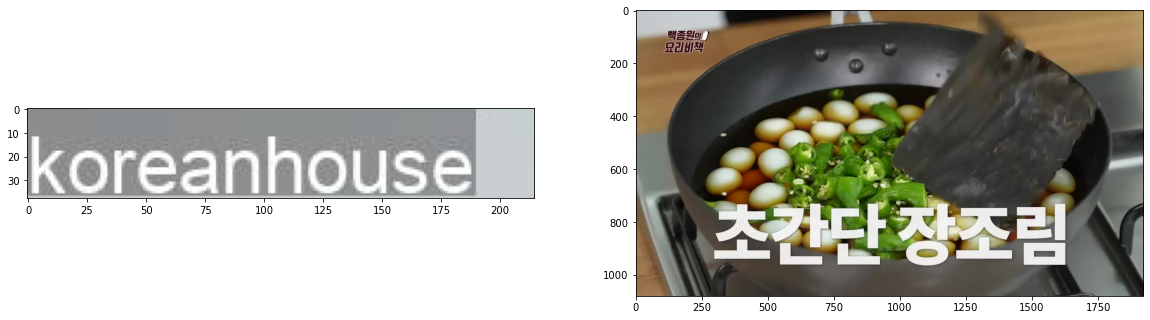

In [573]:
sum_test1 = Image.open('C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/draw/fps_30/egg.mp4/mix/157.jpg')
sum_test2 = Image.open('C:/Users/jcjo/Desktop/code/NotGit/Cook_Video_Analysis/Dataset/frame/egg.mp4/157.jpg')

print(sum_test1.size)
sum_test1_np = np.array(sum_test1)
sum_test2_np = np.array(sum_test2)
# print(sum_test1_np.shape)
# sum_test1_np[20:120, 20:120] = sum_test2_np[20:120, 20:120]
# sum_test1 = Image.fromarray(sum_test1_np)

fig, axes = plt.subplots(1,2, figsize=(20,24))
ax = axes.flatten()
ax[0].imshow(sum_test1_np[20:58, 20:235])
ax[1].imshow(sum_test2)

plt.show()